## Assignment 3_ Part 1_Question 1
- Use "vehicle_collisions" data set.
- For each month in 2016, find out the percentage of collisions in Manhattan out of that year's total accidents in New York City.
- Give an csv output with Four columns ('Month','Manhattan','NYC','Percentage')

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Data/vehicle_collisions.csv")

In [3]:
df.head()

,UNIQUE KEY,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR
0,3146911,1/1/15,0:20,QUEENS,11358.0,40.751847,-73.787862,"(40.7518471, -73.787862)",47 AVENUE,193 STREET,...,SPORT UTILITY/STATION WAGON,NaN,NaN,NaN,NaN,TRAFFIC CONTROL DISREGARDED,NaN,NaN,NaN,NaN
1,3146180,1/1/15,0:20,NaN,NaN,40.771289,-73.946693,"(40.7712888, -73.9466928)",NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,ANIMALS ACTION,NaN,NaN,NaN,NaN
2,3146384,1/1/15,0:21,BROOKLYN,11205.0,40.689445,-73.955121,"(40.6894449, -73.9551212)",BEDFORD AVENUE,LAFAYETTE AVENUE,...,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN,FATIGUED/DROWSY,UNSPECIFIED,NaN,NaN,NaN
3,3146013,1/1/15,0:30,BROOKLYN,11213.0,40.673845,-73.925080,"(40.6738445, -73.9250801)",BUFFALO AVENUE,SAINT MARKS AVENUE,...,BUS,PASSENGER VEHICLE,NaN,NaN,NaN,LOST CONSCIOUSNESS,NaN,NaN,NaN,NaN
4,3146120,1/1/15,0:33,NaN,NaN,NaN,NaN,NaN,RICHMOND TERRACE,SOUTH AVENUE,...,UNKNOWN,PASSENGER VEHICLE,NaN,NaN,NaN,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN


In [4]:
new_df = df.loc[:,['DATE','BOROUGH']]        # Create a temp data frame

In [5]:
new_df['YEAR'] = df['DATE'].apply(lambda x: datetime.strptime(x,'%m/%d/%y').date().strftime('%y'))  # Get year & month

In [6]:
new_df['MONTH'] = df['DATE'].apply(lambda x: datetime.strptime(x,'%m/%d/%y').date().strftime('%b'))

In [7]:
new_df.head()

,DATE,BOROUGH,YEAR,MONTH
0,1/1/15,QUEENS,15,Jan
1,1/1/15,NaN,15,Jan
2,1/1/15,BROOKLYN,15,Jan
3,1/1/15,BROOKLYN,15,Jan
4,1/1/15,NaN,15,Jan


In [8]:
new_df = new_df[new_df.YEAR == '16']         # Filter data set to get year 2016 data only. 

In [9]:
new_df.head()

,DATE,BOROUGH,YEAR,MONTH
217539,1/1/16,MANHATTAN,16,Jan
217540,1/1/16,BROOKLYN,16,Jan
217541,1/1/16,MANHATTAN,16,Jan
217542,1/1/16,MANHATTAN,16,Jan
217543,1/1/16,MANHATTAN,16,Jan


In [10]:
nyc_df = new_df.loc[:,['MONTH','YEAR']]      # Create a new data frame for NYC collision count.

In [11]:
nyc_df.head()

,MONTH,YEAR
217539,Jan,16
217540,Jan,16
217541,Jan,16
217542,Jan,16
217543,Jan,16


In [12]:
nyc_df = nyc_df.groupby('MONTH', sort=False).count().reset_index()         # Get collisions count
nyc_df = nyc_df.rename(columns={'YEAR':'NYC'})                             # Rename column

In [13]:
nyc_df.head()

,MONTH,NYC
0,Jan,18101
1,Feb,15985
2,Mar,18471
3,Apr,18331
4,May,20052


In [14]:
new_df_m = new_df[new_df['BOROUGH'] == 'MANHATTAN']
manhattan_df = new_df_m.loc[:,['MONTH','YEAR']]

In [15]:
manhattan_df = manhattan_df.groupby('MONTH',sort=False).count().reset_index()
manhattan_df = manhattan_df.rename(columns={'YEAR':'MANHATTAN'})

In [16]:
manhattan_df.head()

,MONTH,MANHATTAN
0,Jan,3178
1,Feb,3195
2,Mar,3479
3,Apr,3540
4,May,3432


In [17]:
monthly_df = manhattan_df.merge(nyc_df)

In [18]:
monthly_df.head()

,MONTH,MANHATTAN,NYC
0,Jan,3178,18101
1,Feb,3195,15985
2,Mar,3479,18471
3,Apr,3540,18331
4,May,3432,20052


In [19]:
monthly_df['PERCENTAGE'] = round(monthly_df['MANHATTAN']/monthly_df['NYC'],3)      # Calculate percentage.

In [20]:
monthly_df

,MONTH,MANHATTAN,NYC,PERCENTAGE
0,Jan,3178,18101,0.176
1,Feb,3195,15985,0.200
2,Mar,3479,18471,0.188
3,Apr,3540,18331,0.193
4,May,3432,20052,0.171
5,Jun,2956,19433,0.152
6,Jul,3055,19867,0.154
7,Aug,2844,19678,0.145
8,Sep,2744,19492,0.141
9,Oct,2831,19666,0.144


In [21]:
# Generate output as csv file
monthly_df.to_csv('outputs/monthly_collision_2016.csv', index=False)

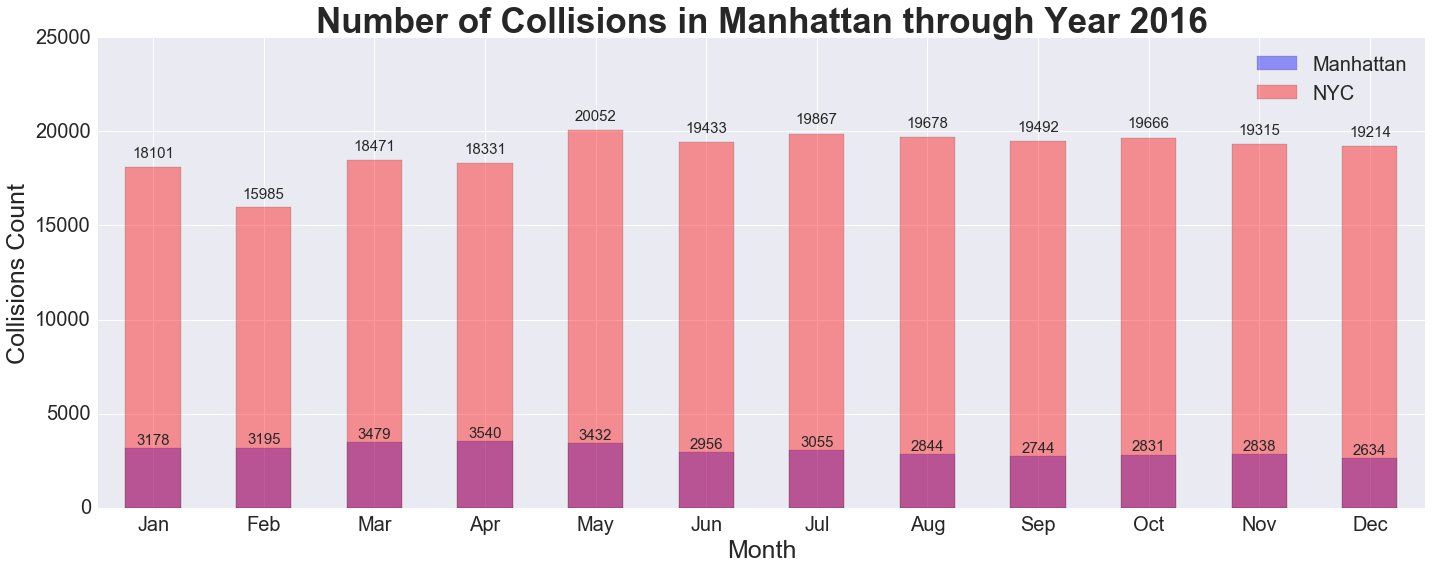

In [22]:
# Generate output as plot. 
manhattan = list(monthly_df['MANHATTAN'])
nyc = list(monthly_df['NYC'])
month = list(monthly_df['MONTH'])

plt.subplots(figsize=(20,8))   
sns.set_style("darkgrid")

index = np.arange(12)
bar_width = 0.5
opacity = 0.4
rects1 = plt.bar(index + bar_width/2, manhattan, bar_width, alpha=opacity, color='b', label='Manhattan')
rects2 = plt.bar(index + bar_width/2, nyc, bar_width, alpha=opacity, color='r', label='NYC')

plt.title('Number of Collisions in Manhattan through Year 2016', fontweight='bold', fontsize=35)     
plt.xlabel('Month', fontsize=25)
plt.ylabel('Collisions Count', fontsize=25)
plt.xticks(index + bar_width, month, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()


def addlabel(rects):      # Add top labels
    for rect in rects:
        height = rect.get_height()
        label_position = height * 1.02
        plt.text(rect.get_x() + rect.get_width()/2., label_position, '%d' % int(height), ha='center', va='bottom', fontsize=15)
addlabel(rects1)
addlabel(rects2)
plt.show()